# Proyecto 03 - Procesamiento del Lenguaje Natural

## Dataset: The Multilingual Amazon Reviews Corpus

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Es un archivo .zip que contiene tres documentos. Más información sobre el dataset [aquí](https://registry.opendata.aws/amazon-reviews-ml/). Es importante que tengas en cuenta la [licencia](https://docs.opendata.aws/amazon-reviews-ml/license.txt) de este dataset.**

### Exploración de datos y Procesamiento del Lenguaje Natural

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Considera que hasta que no hayas aplicado las herramientas de Procesamiento del Lenguaje Natural vistas, será difícil completar este análisis. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿qué palabras están asociadas a calificaciones positivas y qué palabras a calificaciones negativas?

### Machine Learning

Implementa un modelo que, dada la crítica de un producto, asigne la cantidad de estrellas correspondiente. **Para pensar**: ¿es un problema de Clasificación o de Regresión?

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?

**Recomendación:** si no te resulta conveniente trabajar en español con NLTK, te recomendamos que explores la librería [spaCy](https://spacy.io/).

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Valdrá la pena convertir el problema de Machine Learning en un problema binario? Es decir, asignar únicamente las etiquetas Positiva y Negativa a cada crítica y hacer un modelo que, en lugar de predecir las estrellas, prediga esa etiqueta. Pensar en qué situación puede ser útil. ¿Esperas que el desempeño sea mejor o peor?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### Librerías Útiles

In [9]:
import itertools

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import nltk

#Esto sirve para configurar NLTK. La primera vez puede tardar un poco
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vanes\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vanes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
data = pd.read_json('dataset_es_dev.json', lines=True)
data

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty
...,...,...,...,...,...,...,...,...
4995,es_0179515,product_es_0158275,reviewer_es_0273644,5,Me ha encantado la cesta. Ha llegado impecable...,guadalupe,es,home
4996,es_0894902,product_es_0953259,reviewer_es_0153773,5,Desempeña su función correctamente,calidad precio,es,camera
4997,es_0760496,product_es_0731995,reviewer_es_0171091,5,Me ha encantado la diadema! Las flores son tal...,Excelente,es,toy
4998,es_0178380,product_es_0402051,reviewer_es_0686937,5,"A mi me gustan mucho las fundas TPU, ya que so...",Genial,es,wireless


# Análisis Exploratorio de Datos

In [31]:
data.shape

(5000, 8)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   review_id         5000 non-null   object
 1   product_id        5000 non-null   object
 2   reviewer_id       5000 non-null   object
 3   stars             5000 non-null   int64 
 4   review_body       5000 non-null   object
 5   review_title      5000 non-null   object
 6   language          5000 non-null   object
 7   product_category  5000 non-null   object
dtypes: int64(1), object(7)
memory usage: 312.6+ KB


In [33]:
data.isna().sum()

review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
dtype: int64

In [ ]:
data=data.drop[columns='language', inplace=True, axis=1]

Text(0, 0.5, 'Cantidad de Reviews')

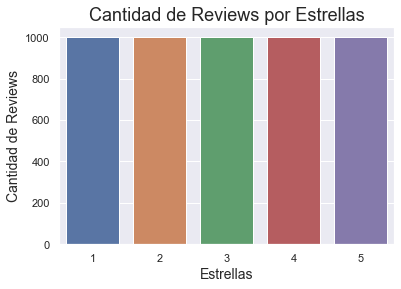

In [37]:
sns.countplot(data=data, x='stars')
plt.title('Cantidad de Reviews por Estrellas', fontsize=18)
plt.xlabel('Estrellas', fontsize=14)
plt.ylabel('Cantidad de Reviews', fontsize=14)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'wireless'),
  Text(1, 0, 'home'),
  Text(2, 0, 'toy'),
  Text(3, 0, 'sports'),
  Text(4, 0, 'home_improvement'),
  Text(5, 0, 'pc'),
  Text(6, 0, 'electronics'),
  Text(7, 0, 'beauty'),
  Text(8, 0, 'automotive'),
  Text(9, 0, 'kitchen'),
  Text(10, 0, 'book'),
  Text(11, 0, 'drugstore'),
  Text(12, 0, 'furniture'),
  Text(13, 0, 'apparel'),
  Text(14, 0, 'baby_product'),
  Text(15, 0, 'office_product'),
  Text(16, 0, 'other'),
  Text(17, 0, 'luggage'),
  Text(18, 0, 'lawn_and_garden'),
  Text(19, 0, 'pet_products'),
  Text(20, 0, 'personal_care_appliances'),
  Text(21, 0, 'camera'),
  Text(22, 0, 'shoes'),
  Text(23, 0, 'digital_ebook_purchase'),
  Text(24, 0, 'watch'),
  Text(25, 0, 'musical_instruments'),
  Text(26, 0, 'video_games'),
  Text(27, 0, 'industrial_supplies'),
  Text(28, 0, 'jewelry'),
  Text(29, 0, 'grocery')])

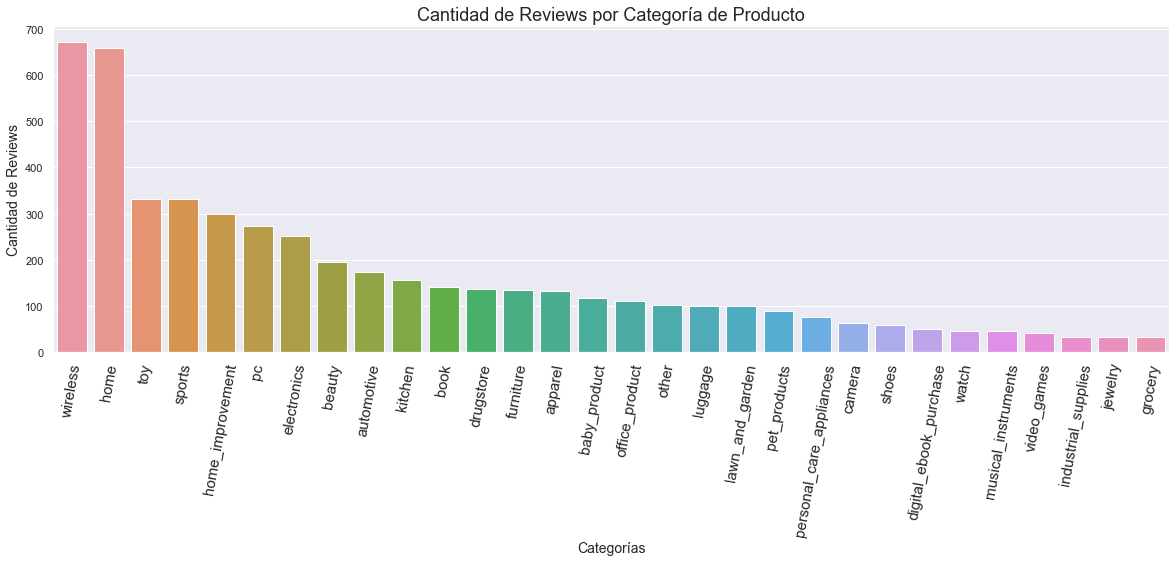

In [61]:
plt.subplots(figsize=(20,6))
sns.countplot(data=data, x='product_category', order = data['product_category'].value_counts().index)
plt.title('Cantidad de Reviews por Categoría de Producto', fontsize=18)
plt.xlabel('Categorías', fontsize=14)
plt.ylabel('Cantidad de Reviews', fontsize=14)
plt.xticks(rotation=80, fontsize=15)

In [71]:
for i in range(0,5):
    index_random = np.random.randint(0,4999)
    review_title = data.review_title.iloc[index_random,]
    stars=data.stars.iloc[index_random,]
    print(index_random, review_title, stars)

474 Mala esperiencia 1
1111 Poca batería. No recomiendo comprarla. 2
3997 Queda muy bien en la cama abriga y es perfecto para regalar también 4
1937 Más pequeños de lo que creía 2
3734 Cepillos estupendos 4


# Preprocesamiento de los Datos

In [72]:
una=data[data.stars==1]
dos=data[data.stars==2]
tres=data[data.stars==3]
cuatro=data[data.stars==4]
cinco=data[data.stars==5]

## Tokenización